<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

In [10]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [11]:
import tensorflow as tf
print(tf.version.VERSION)

2.17.0


In [12]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.3.0


In [13]:
!python --version

Python 3.10.12


In [14]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0 (from 0)
Receiving objects: 100% (2650/2650), 34.02 MiB | 20.29 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.1/240.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.5 MB/s eta 0:00:00


In [ ]:
!pip install 'keras<3.0.0' mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-metadata to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-auth-oauthlib to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [9]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.tools import tokenization
from official.nlp import optimization

ModuleNotFoundError: No module named 'official'

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [ ]:
#pip install -U tensorflow-text==2.15.0


In [ ]:
import torch
import random
import os
import keras

In [ ]:
def set_seed(seed):
    if seed is not None:
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        np.random.seed(seed)
        random.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        keras.utils.set_random_seed(seed)



In [ ]:
# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

In [ ]:
set_seed(42)

In [ ]:
torch.use_deterministic_algorithms(True)


In [ ]:
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_pickle("./final_aug.pkl") #apri il df dal file salvato dfn


#df=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
#               compression='zip', low_memory=False)

df.shape

(1100, 5)

In [ ]:
df.tail(20)

,link,text,label,textlen,translated_text
1080,augmented,"Così, ad esempio, a finire per prevalere nel d...",1,-1,"So, for example, what ends up prevailing in pu..."
1081,augmented,,1,-1,"[In recent years, for example, the majority of..."
1082,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,It is less Difficult to predict that in Chiaia...
1083,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,It is less difficult to predict that in Chiaia...
1084,augmented,,1,-1,"[Instagram We are also on Instagram, follow us..."
1085,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,It is Less difficult to predict that in Chiaia...
1086,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,It is to_a_lesser_extent difficult to predict ...
1087,augmented,,1,-1,[It is less difficult to predict that in Chiai...
1088,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,it Is less Difficult to predict that in Chiaia...
1089,augmented,È meno difficile prevedere che a Chiaia e al V...,1,-1,It is less difficult to predict that in Chiaia...


In [ ]:
df = df[df['label'].notna()]


In [ ]:
df.shape

(1100, 5)

In [ ]:
df = df.rename(columns={'label': 'target'})

<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

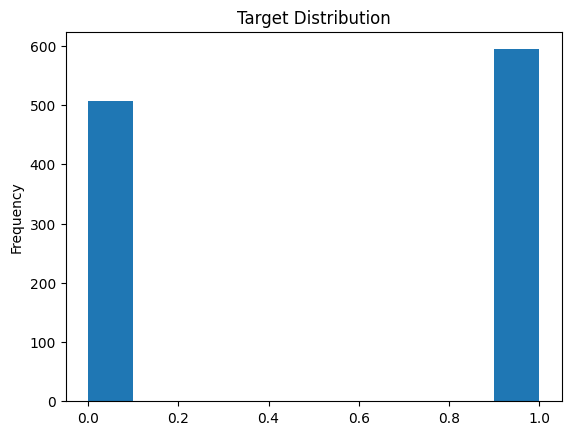

In [ ]:
df.target.plot(kind='hist', title='Target Distribution')

In [ ]:
df=df.drop(columns=['text']) #per usare testo inglese (droppa testo italiano)
#df=df.drop(columns=['translated_text']) #per usare testo italiano (droppa testo inglese)

In [ ]:
df = df.rename(columns={'translated_text': 'text'}) #per usare testo inglese

In [ ]:
train_df, remaining=train_test_split(df, random_state=42, train_size=0.7, stratify=df.target.values) #dopo si può cambiare  train_size e usare tutto il dataset. ora solo per fare prima facciamo così
valid_df=remaining #togliere nel caso si voglia usare sia train che test
#valid_df, _=train_test_split(remaining, random_state=42, train_size=0.3, stratify=remaining.target.values) #prima usavo questo
train_df.shape, valid_df.shape

((770, 4), (330, 4))

In [ ]:
type(train_df['text'].values), type(train_df['target'].values)

(numpy.ndarray, numpy.ndarray)

In [ ]:
with tf.device('/cpu:0'):
  #train_x=np.asarray(train_df['text'].values).astype('str')
  train_x = np.asarray([str(t) for t in train_df['text'].values]) # Convert each element to string explicitly
  train_y=np.asarray(train_df['target'].values).astype('float32')
  # valid_x=np.asarray(valid_df['text'].values).astype('str')
  valid_x = np.asarray([str(t) for t in valid_df['text'].values]) # Convert each element to string explicitly
  valid_y=np.asarray(valid_df['target'].values).astype('float32')
  train_data=tf.data.Dataset.from_tensor_slices((train_x, train_y))
  valid_data=tf.data.Dataset.from_tensor_slices((valid_x, valid_y))

  for text, label in train_data.take(1):
    print(text)
    print(label)


# with tf.device('/cpu:0'):
#   train_data=tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['target'].values))
#   valid_data=tf.data.Dataset.from_tensor_slices((valid_df['text'].values, valid_df['target'].values))

#   for text, label in train_data.take(1):
#     print(text)
#     print(label)


tf.Tensor(b'agency\n\nHowever, consistency in candidacy with Avs was appreciated\n\nROME, 07 MAY \xe2\x80\x93 \xe2\x80\x9cI gave all my solidarity to Salis\xe2\x80\x99 father because as a father I recognized his suffering but I have no sympathy for those who go abroad to commit a crime, if proven\xe2\x80\x9d. This is what the President of the Senate Ignazio La Russa said in a ping pong game on Rai Radio 1 \xe2\x80\x9cRunning? It\xe2\x80\x99s legal\xe2\x80\x9d said La Russa, specifying that however \xe2\x80\x9cit could also be seen as a challenge to the judiciary. The only thing I appreciated about Salis was the choice to run where it is more difficult to be elected than in the PD, but in a party closer to her ideas. And in fact she is running with her comrades. Hats off for consistency\xe2\x80\x9d, he underlined.\n\nCOPYRIGHT LASICILIA.IT \xc2\xa9 REPRODUCTION RESERVED', shape=(), dtype=string)
tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
label_list=[0,1] # Label categories
max_seq_length=512 # maximum length of (token) input sequences (128 funziona)
train_batch_size=32

# Get BERT layer and tokenizer:
bert_layer=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=False) #trainable=False quando si vuole usare deterministic
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')) #poi ci va messo anche il token_id di inizio e fine frase

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Tokenize and Preprocess Text

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example=classifier_data_lib.InputExample(guid=None,
                                           text_a=text.numpy(),
                                           text_b=None,
                                           label=label.numpy())
  feature=classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return(feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id=tf.py_function(to_feature, inp=[text,label],
                                                              Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([]) #lo lasciamo blank, può essere binary classification, multinonsoche classification,...

  x={
      'input_word_ids':input_ids,
      'input_mask':input_mask,
      'input_type_ids':segment_ids
  }

  return(x, label_id)

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data=(train_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE)).shuffle(30).batch(32,drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)


  # valid
  valid_data=(valid_data.map(to_feature_map,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE)).batch(32,drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE)



In [ ]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

Add a Classification Head to the BERT Layer

In [ ]:
# Building the model
def create_model():
  max_seq_length = 512  # Your choice here.
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
  drop=tf.keras.layers.Dropout(0.01)(pooled_output)
  output=tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)
  model=tf.keras.Model(
      inputs={
          'input_word_ids':input_word_ids,
          'input_mask':input_mask,
          'input_type_ids':input_type_ids
      },
      outputs=output)
  return model


## Fine-Tune BERT for Text Classification

In [ ]:
model=create_model()
loss_function = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-1),
              loss=loss_function,
              metrics=[tf.keras.metrics.BinaryAccuracy()]) #QUI POI CAMBIAMO PERCHé L'ACCURACY NON è LA METRICA MIGLIORE, MA PER SEMPLICITà ORA VA BENE COSì
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 512)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                              

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
# Train model
epochs=2 #max altrimenti probabilmente overfitta
history=model.fit(train_data,
                  validation_data=valid_data,
                  epochs=epochs,
                  verbose=1
                  )

Epoch 1/2
24/24 [==============================] - 355s 15s/step - loss: 3.0284 - binary_accuracy: 0.5586 - val_loss: 0.7310 - val_binary_accuracy: 0.7375
Epoch 2/2
24/24 [==============================] - 349s 15s/step - loss: 0.9729 - binary_accuracy: 0.7148 - val_loss: 0.5775 - val_binary_accuracy: 0.7469


In [ ]:
print("TF Version: ", tf.__version__)


TF Version:  2.15.0


## Evaluate

In [ ]:
# import matplotlib.pyplot as plt

# def plot_graphs(history, metric):
#   plt.plot(history.history[metric])
#   plt.plot(history.history['val_'+metric], '')
#   plt.xlabel("Epochs")
#   plt.ylabel(metric)
#   plt.legend([metric, 'val_'+metric])
#   plt.show()

In [ ]:
#plt.plot_graphs(history, loss)

In [ ]:
# plt.graphs(history, 'binary_accuracy')

In [ ]:
frase1="I meridionali sono tutti ladri"
frase2="Indagato l'artista Morgan per accusa di stalking e violenza sessuale, l'artista avrebbe anche avuto comportamenti a dir poco preoccupanti, ad esempio ingaggiare due siciliani per pedinare l'ex fidanzata"
frase3="Alle persone meridionali piace fare le vittime"
frase4="Eccellenza napoletana, l'ospedale Pascale testa una nuova procedura non invasiva per l'asporto di tumori della pelle"
frase5=""
sample_example=[frase1, frase2, frase3, frase4]
test_data=tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data=(test_data.map(to_feature_map).batch(1))
preds=model.predict(test_data)
threshold= 0.02 #scegliere un valore tra 0 e 1
['antimeridionalista' if pred>=threshold else 'neutro' for pred in preds]


4/4 [==============================] - 10s 2s/step


['antimeridionalista',
 'antimeridionalista',
 'antimeridionalista',
 'antimeridionalista']

In [ ]:
sample_example=valid_df['text'].tolist()
valid_y=valid_df['target'].tolist()

sample_example = [str(item) for item in sample_example]
valid_y = np.array(valid_y)

test_data=tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data=(test_data.map(to_feature_map).batch(1))

preds=model.predict(test_data)
t1= 0.02 #scegliere un valore tra 0 e 1
t2=0.05
t3=0.1
t4=0.15
t5=0.2
t6=0.25
t7=0.3
t8=0.35
t9=0.4
t10=0.45
t11=0.5
p1=[1 if pred>=t1 else 0 for pred in preds]
p2=[1 if pred>=t2 else 0 for pred in preds]
p3=[1 if pred>=t3 else 0 for pred in preds]
p4=[1 if pred>=t4 else 0 for pred in preds]
p5=[1 if pred>=t5 else 0 for pred in preds]
p6=[1 if pred>=t6 else 0 for pred in preds]
p7=[1 if pred>=t7 else 0 for pred in preds]
p8=[1 if pred>=t8 else 0 for pred in preds]
p9=[1 if pred>=t9 else 0 for pred in preds]
p10=[1 if pred>=t10 else 0 for pred in preds]

330/330 [==============================] - 726s 2s/step


In [ ]:
p11=[1 if pred>=t11 else 0 for pred in preds]
p12=[1 if pred>=0.55 else 0 for pred in preds]
p13=[1 if pred>=0.6 else 0 for pred in preds]
p14=[1 if pred>=0.65 else 0 for pred in preds]
p15=[1 if pred>=0.7 else 0 for pred in preds]
p16=[1 if pred>=0.75 else 0 for pred in preds]
p17=[1 if pred>=0.8 else 0 for pred in preds]

In [ ]:

print("Shape of valid_y:", valid_y.shape)
print("Shape of y_val_predd:", len(p1))  # Assuming y_val_predd is a list


Shape of valid_y: (330,)
Shape of y_val_predd: 330


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       152
           1       0.58      1.00      0.74       178

    accuracy                           0.62       330
   macro avg       0.79      0.58      0.51       330
weighted avg       0.78      0.62      0.53       330


Confusion Matrix:


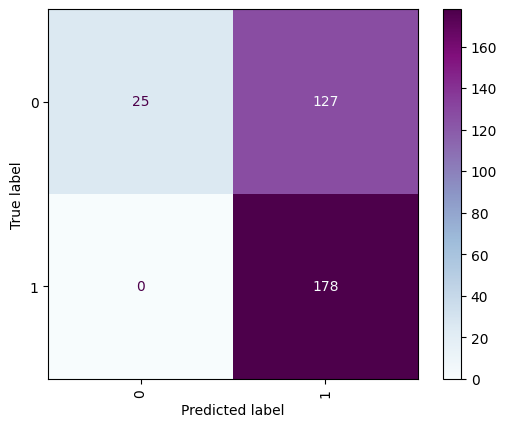

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

print("Classification Report:")
print(classification_report(valid_y, p1))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p1, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       152
           1       0.62      1.00      0.77       178

    accuracy                           0.67       330
   macro avg       0.81      0.64      0.61       330
weighted avg       0.80      0.67      0.62       330


Confusion Matrix:


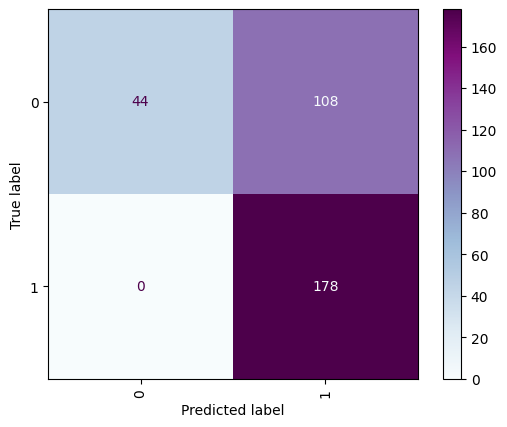

In [ ]:

print("Classification Report:")
print(classification_report(valid_y, p2))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p2, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.57       152
           1       0.66      1.00      0.79       178

    accuracy                           0.72       330
   macro avg       0.83      0.70      0.68       330
weighted avg       0.82      0.72      0.69       330


Confusion Matrix:


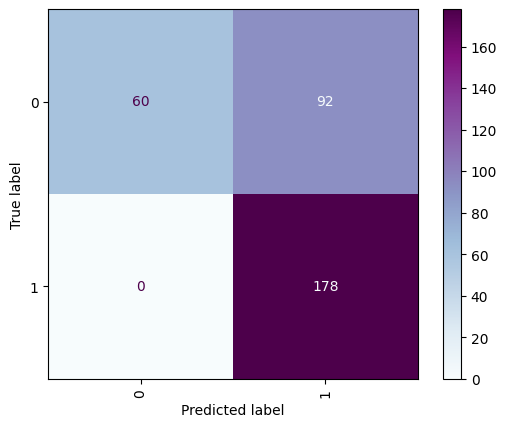

In [ ]:

print("Classification Report:")
print(classification_report(valid_y, p3))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p3, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61       152
           1       0.68      0.98      0.80       178

    accuracy                           0.74       330
   macro avg       0.82      0.72      0.71       330
weighted avg       0.81      0.74      0.71       330


Confusion Matrix:


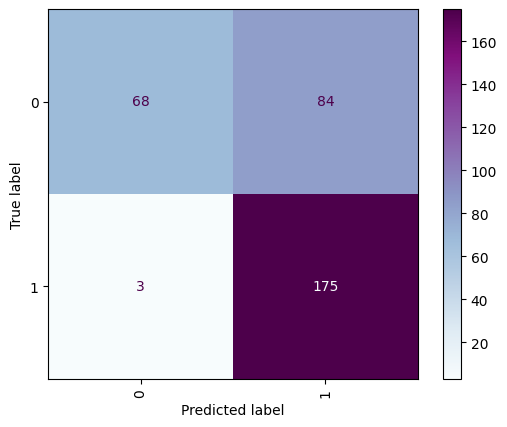

In [ ]:

print("Classification Report:")
print(classification_report(valid_y, p4))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p4, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.49      0.64       152
           1       0.69      0.97      0.81       178

    accuracy                           0.75       330
   macro avg       0.81      0.73      0.72       330
weighted avg       0.80      0.75      0.73       330


Confusion Matrix:


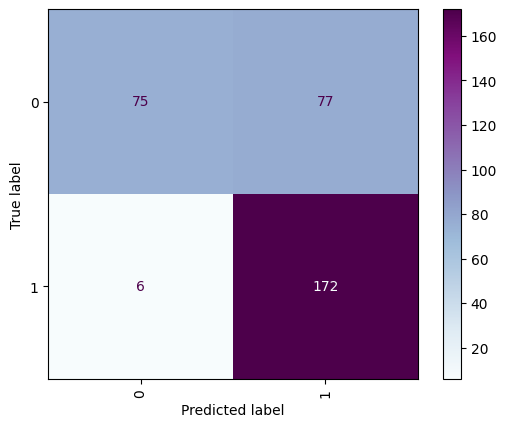

In [ ]:

print("Classification Report:")
print(classification_report(valid_y, p5))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p5, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.68       152
           1       0.71      0.96      0.82       178

    accuracy                           0.77       330
   macro avg       0.81      0.75      0.75       330
weighted avg       0.80      0.77      0.75       330


Confusion Matrix:


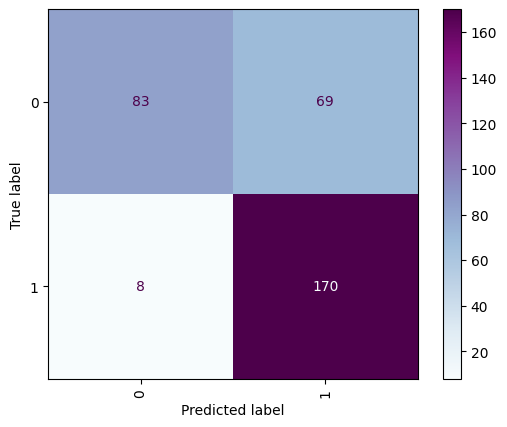

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p6))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p6, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       152
           1       0.71      0.92      0.80       178

    accuracy                           0.75       330
   macro avg       0.78      0.74      0.74       330
weighted avg       0.78      0.75      0.75       330


Confusion Matrix:


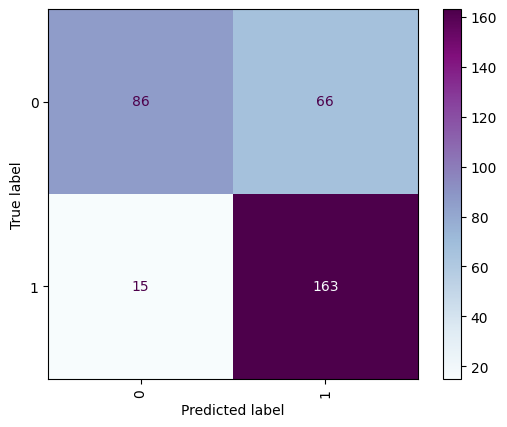

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p7))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p7, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       152
           1       0.72      0.88      0.79       178

    accuracy                           0.75       330
   macro avg       0.76      0.74      0.74       330
weighted avg       0.76      0.75      0.74       330


Confusion Matrix:


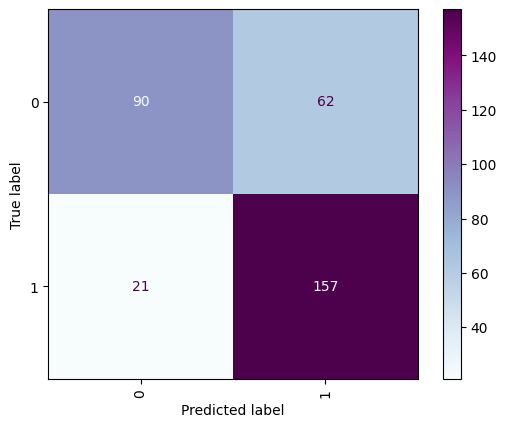

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p8))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p8, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       152
           1       0.73      0.86      0.79       178

    accuracy                           0.75       330
   macro avg       0.76      0.75      0.75       330
weighted avg       0.76      0.75      0.75       330


Confusion Matrix:


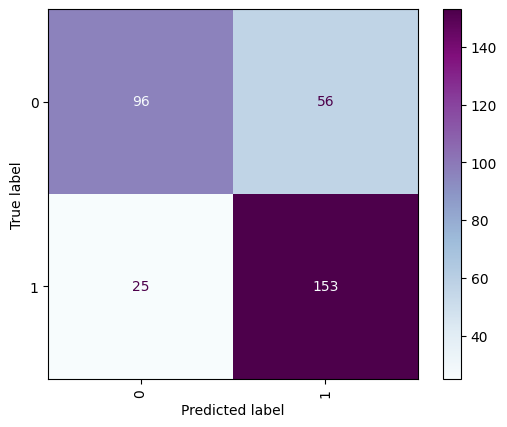

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p9))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p9, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       152
           1       0.73      0.85      0.79       178

    accuracy                           0.75       330
   macro avg       0.76      0.74      0.74       330
weighted avg       0.76      0.75      0.75       330


Confusion Matrix:


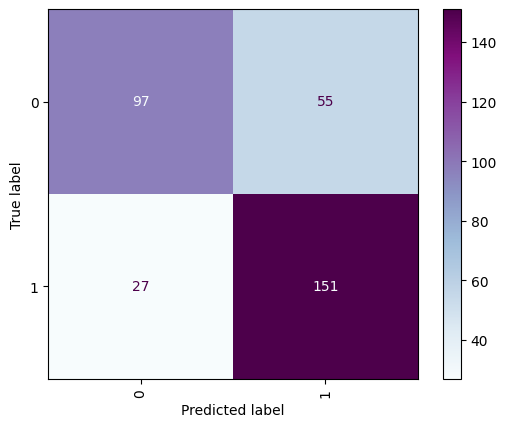

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p10))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p10, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       152
           1       0.74      0.82      0.78       178

    accuracy                           0.75       330
   macro avg       0.75      0.74      0.74       330
weighted avg       0.75      0.75      0.75       330


Confusion Matrix:


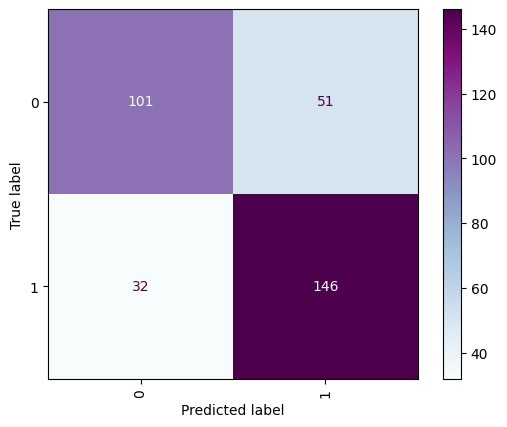

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p11))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p11, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       152
           1       0.76      0.82      0.79       178

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330


Confusion Matrix:


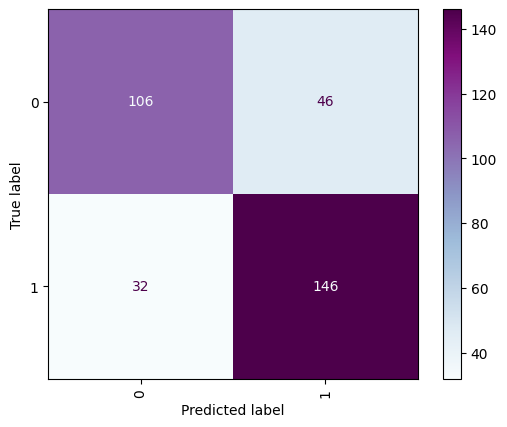

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p12))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p12, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       152
           1       0.76      0.80      0.78       178

    accuracy                           0.75       330
   macro avg       0.75      0.75      0.75       330
weighted avg       0.75      0.75      0.75       330


Confusion Matrix:


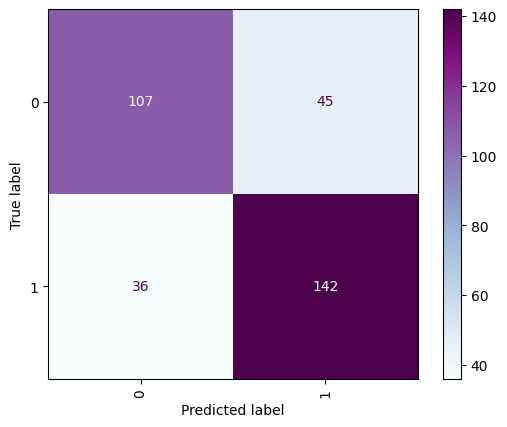

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p13))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p13, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       152
           1       0.79      0.79      0.79       178

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330


Confusion Matrix:


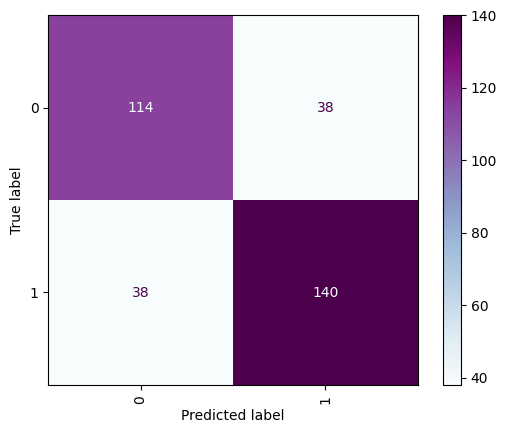

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p14))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p14, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       152
           1       0.79      0.76      0.78       178

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330


Confusion Matrix:


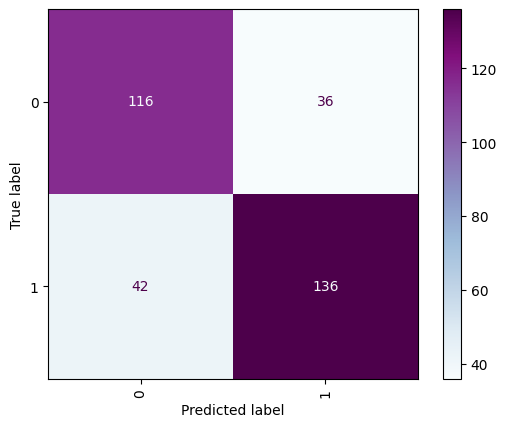

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p15))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p15, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       152
           1       0.81      0.75      0.78       178

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330


Confusion Matrix:


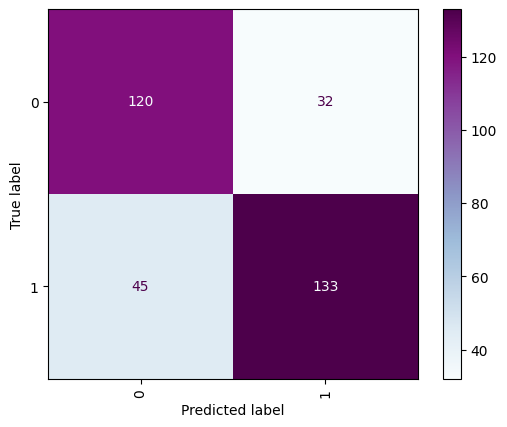

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p16))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p16, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       152
           1       0.81      0.71      0.76       178

    accuracy                           0.75       330
   macro avg       0.76      0.76      0.75       330
weighted avg       0.76      0.75      0.75       330


Confusion Matrix:


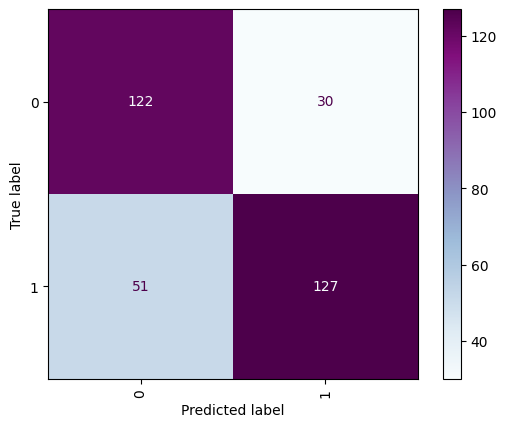

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p17))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p17, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       152
           1       0.77      0.79      0.78       178

    accuracy                           0.76       330
   macro avg       0.76      0.75      0.76       330
weighted avg       0.76      0.76      0.76       330


Confusion Matrix:


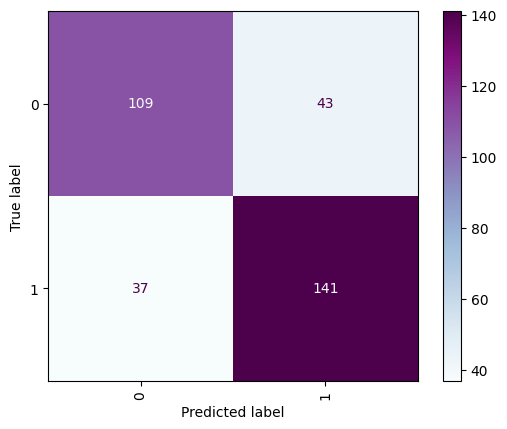

In [ ]:
p18=[1 if pred>=0.625 else 0 for pred in preds]
print("Classification Report:")
print(classification_report(valid_y, p18))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p18, xticks_rotation='vertical', cmap='BuPu'))


# Save the Model

In [ ]:

# Salva il modello
output_dir = './modello_salvato/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Instead of save_pretrained, use model.save for Keras models
model.save(output_dir) # Save the Keras model to the specified directory

# If tokenizer needs to be saved separately, you can use:
#import json
#with open(os.path.join(output_dir, 'tokenizer_config.json'), 'w') as f:
#    f.write(json.dumps(tokenizer.get_config()))
# This assumes tokenizer has a get_config method and its config is JSON serializable

In [ ]:
from google.colab import files

files.download('/content/modello_salvato')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load the model and evaluate its performance on the validation dataset that we created

In [7]:
import numpy as np

In [2]:
import pandas as pd
validation=pd.read_pickle('./final_validation.pkl')

In [8]:
sample_example=validation['translated_text'].tolist()
valid_y=validation['label'].tolist()

sample_example = [str(item) for item in sample_example]
valid_y = np.array(valid_y)

test_data=tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data=(test_data.map(to_feature_map).batch(1))

preds=model.predict(test_data)
t1= 0.1 #scegliere un valore tra 0 e 1
t2=0.50
t3=0.65
t4=0.7
p1=[1 if pred>=t1 else 0 for pred in preds]
p2=[1 if pred>=t2 else 0 for pred in preds]
p3=[1 if pred>=t3 else 0 for pred in preds]
p4=[1 if pred>=t4 else 0 for pred in preds]


NameError: name 'tf' is not defined

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [5]:
print("Classification Report:")
print(classification_report(valid_y, p1))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p1, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:


NameError: name 'p1' is not defined

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p2))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p2, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.17      0.23       310
           1       0.44      0.65      0.53       312

    accuracy                           0.41       622
   macro avg       0.39      0.41      0.38       622
weighted avg       0.39      0.41      0.38       622


Confusion Matrix:


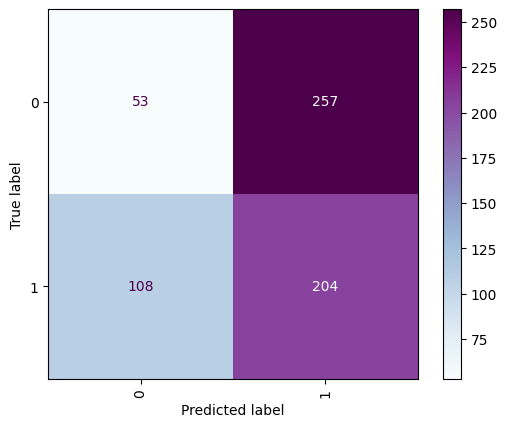

In [ ]:
print("Classification Report:")
print(classification_report(valid_y, p3))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p3, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.33      0.36       310
           1       0.42      0.48      0.45       312

    accuracy                           0.41       622
   macro avg       0.40      0.41      0.40       622
weighted avg       0.40      0.41      0.40       622


Confusion Matrix:


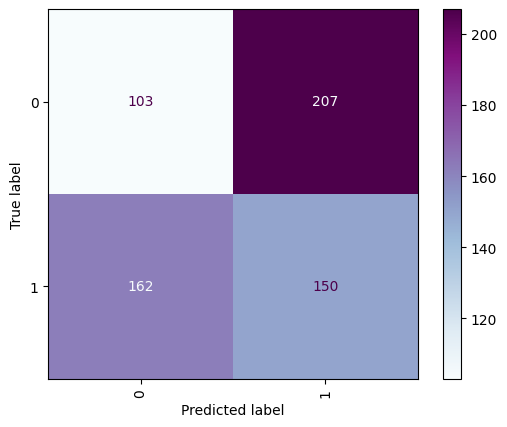

In [ ]:

print("Classification Report:")
print(classification_report(valid_y, p4))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p4, xticks_rotation='vertical', cmap='BuPu'))

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.43       310
           1       0.43      0.42      0.43       312

    accuracy                           0.43       622
   macro avg       0.43      0.43      0.43       622
weighted avg       0.43      0.43      0.43       622


Confusion Matrix:


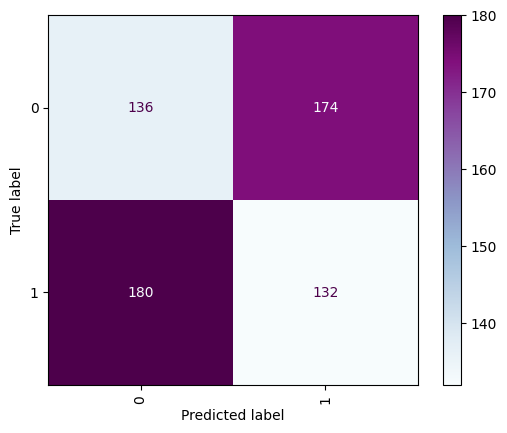

In [ ]:
t5=0.95
p5=[1 if pred>=t5 else 0 for pred in preds]
print("Classification Report:")
print(classification_report(valid_y, p5))
print()

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(valid_y, p5, xticks_rotation='vertical', cmap='BuPu'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
